In [37]:
#f = open('/content/sample_data/IR_TASK.csv', 'r')
#docs = f.read().split("\n")
#print(len(docs))

import pandas as pd
df = pd.read_csv('/content/sample_data/IR_TASK.csv', header=None)

docs = df.iloc[ : , 2]
print(docs)

0                                                content
1      A study led by the University of Exeter of mor...
2      The 45-year-old woman was having sex with her ...
3      The film changes colour based on levels of nit...
4      Beauty and cosmetic clinics across the UK have...
                             ...                        
317    D.C United suffered a 3-0 defeat to Charlotte ...
318    A number of professional riders were injured f...
319    Iconic US sporting identity Pat McAfee has sho...
320    Scully was the longest-tenured broadcaster wit...
321    Knights coach Adam O'Brien is reportedly close...
Name: 2, Length: 322, dtype: object


In [38]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

sw = stopwords.words('english')
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()
filtered_docs = []
for doc in docs:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in sw:
            tmp += ps.stem(w) + " "
    filtered_docs.append(tmp)

print(filtered_docs)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['content ', 'a studi led univers exet 50,000 adult analys differ take blood pressur measur two arm compar one . ', 'the 45-year-old woman sex husband hattiesburg , mississippi , felt sudden , stab pain near heart . she suffer leak aorta orgasm . ', 'the film chang colour base level nitrat . an app analys colour give nitrit concentr valu , report expert universidad de burgo , spain . ', "beauti cosmet clinic across uk told stop promot riski hay fever inject risk target enforc action britain 's advertis drug watchdog . ", "analysi fair health - one america 's largest claim databas - show 357 percent surg claim link tick-born ill 2007 2021 rural area . ", 'when luke pembrok diagnos bleed disord haemophilia 11 month old , doctor offer mother debra glimmer hope - one day might cure . ', 'the studi nine over-65 prediabet barcelona , spain , measur switch quinoa-rich diet impact blood glucos level weight . ', "research cambridg univers said 'no evid causal link ' prostat cancer prostat size 

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_docs)
print(X.todense())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.21109795 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [91]:
from sklearn.cluster import KMeans
K = 3 
model = KMeans(n_clusters=K)#, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("cluster no. of input documents, in the order they received:")
print(model.labels_)

cluster no. of input documents, in the order they received:
[1 0 2 1 0 0 2 0 0 0 2 0 1 1 0 0 0 0 0 2 0 1 1 0 1 0 0 0 0 0 1 0 1 1 0 1 0
 0 1 1 1 1 0 0 0 0 0 0 1 0 1 2 0 1 1 0 0 1 1 0 0 0 2 1 0 0 1 0 1 0 1 0 1 0
 0 2 0 1 1 0 0 0 0 0 2 0 0 1 0 1 0 1 0 1 2 0 1 1 1 0 0 1 0 0 0 0 2 2 1 1 2
 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 2 1 1 1 2 1 1 0 0 1 1 2 1 2 0 1 1 1 0 0 0 0
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 2 1 1 2 2 1 2 2 2 2 1 1 2 2 2
 2 2 1 1 1 2 1 1 1 2 2 2 2 2 1 2 2 2 1 1 2 1 1 2 1 1 1 2 1 1 2 2 2 2 2 0 2
 1 2 1 2 2 1 2 1 2 2 1 2 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 2 0 1 1 2 1 0 2
 0 0 2 1 2 2 1 1 1 1 1 2 2 0 1 2 1 1 2 2 1 2 1 2 1 2 1 2 1 1 1 1 2 2 1 1 2
 1 2 1 2 2 2 2 2 1 1 2 1 2 2 1 2 2 2 1 1 2 1 1 1 2 2]


In [92]:
Y = vectorizer.transform(["The Indiana Department of Health announced the infections when it updated its cases tally, but refused to give any further information citing privacy concerns."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["Severe equipment and manpower problems could slow President Vladimir V. Putin’s mission as the war enters its sixth month."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["The LaLiga side have agreed to pay the Brazilian's salary in full but there will be no loan fee or option to buy for the left-back who has fallen out of favour under Ten Hag"])
prediction = model.predict(Y)
print(prediction)


[1]
[1]
[2]


In [93]:
test_doc = ["I like football London",
             "Bitcoin is great.",
             "I study at Coventry University"
           ]
filtered_test_docs = []
for doc in test_doc:
    tokens = word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in sw:
            tmp += ps.stem(w) + " "
    filtered_test_docs.append(tmp)

print(filtered_test_docs)

Y = vectorizer.transform([filtered_test_docs[0]])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform([filtered_test_docs[1]])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform([filtered_test_docs[2]])
prediction = model.predict(Y)
print(prediction)


['i like footbal london ', 'bitcoin great . ', 'i studi coventri univers ']
[0]
[1]
[0]


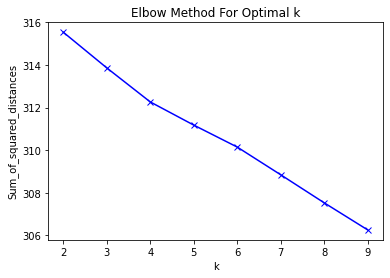

In [94]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

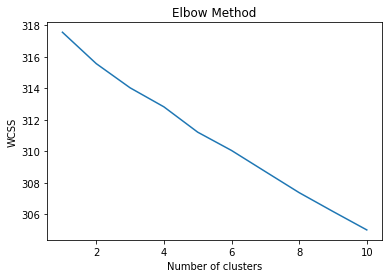

In [95]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [96]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
K = 3
document1 = []
document2 = []
document3 = []
for i in range(K):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :50]: #print out 10 feature terms of each cluster
        #print (' %s' % terms[j])
        if i == 0:
          document1.append(terms[j])
        elif i == 1:
          document2.append(terms[j])
        elif i == 2:
          document3.append(terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
------------
Cluster 1:
------------
Cluster 2:
------------


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


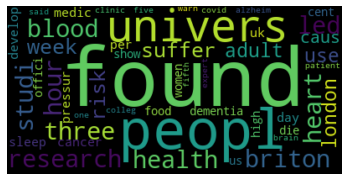

In [97]:
!pip install WordCloud
from wordcloud import WordCloud
#print(('Cluster 0: Politics')

import matplotlib.pyplot as plt
#text = order_centroids[0, :10]
#
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(document1))

#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

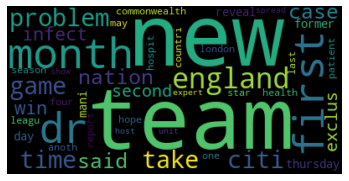

In [98]:
#text = order_centroids[0, :10]
#Sport
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(document2))

#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

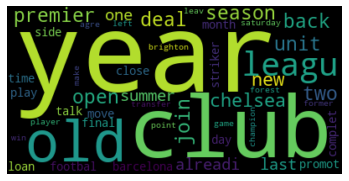

In [99]:
#text = order_centroids[0, :10]
#Health
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(' '.join(document3))

#Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

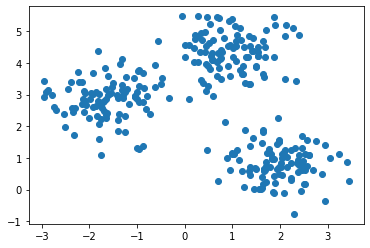

In [100]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

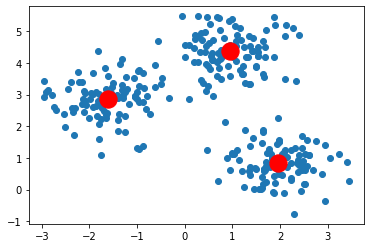

In [101]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()